## Exploration of olympic history data
 - Download the zip all CSVs from here: [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).
 - Read the [dataset overview](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home)
 - Use pandas.ipynb from the videos as a reference - https://github.com/justmarkham/pandas-videos/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load athlete_events.csv into a datatrame called `df`

In [7]:
df = pd.read_csv('athlete_events.csv')

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Youngest and oldest participants
Note that the youngest participant was 10 and the oldest 97 ! Find who they are and what sports they cometed in. 
 - hint: read about idxmin() function

In [82]:
young_n_old = df.loc[[df['Age'].idxmin(), df['Age'].idxmax()]][['Name', 'Age', 'Sport', 'Event','Team','Medal']]

young_n_old


,Name,Age,Sport,Event,Team,Medal
142882,Dimitrios Loundras,10.0,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Ethnikos Gymnastikos Syllogos,Bronze
257054,John Quincy Adams Ward,97.0,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",United States,NaN


### How many unique athletes are listed in the dataset?

In [87]:
num_of_athletes = df.Name.nunique()


134732

### How many unique athletes got any medals?

In [129]:
len(df[df.Medal.notnull()].groupby('ID'))

# or

# df[df.Medal.notnull()].ID.nunique()

28251

### How many medals of each type were awarded?

In [151]:
# df.groupby('Medal')['ID'].nunique()

df.groupby('Medal').ID.count()

Medal
Bronze    13295
Gold      13372
Silver    13116
Name: ID, dtype: int64

### Waht's the newest olympic sport in this dataset?

In [183]:
df.groupby('Sport').Year.min().sort_values(ascending=False).iloc[:1]

# OR

# df.groupby('Sport').Year.min().sort_values(ascending=False).idxmax()

'Rugby Sevens'

### What sport had the most participants in the latest summer games?

In [210]:
last_summer_games = df[(df.Year == 2016) & (df.Season == 'Summer')]
last_summer_games.groupby('Sport').ID.count().sort_values(ascending=False).iloc[:1]

# OR 

# remove iloc for all values
last_summer_games.groupby('Sport').ID.count().sort_values(ascending=False)

Sport
Athletics                2508
Swimming                 1568
Gymnastics                861
Cycling                   667
Shooting                  555
Rowing                    550
Football                  473
Canoeing                  441
Hockey                    390
Judo                      389
Sailing                   380
Equestrianism             355
Handball                  353
Fencing                   346
Wrestling                 346
Rugby Sevens              299
Tennis                    286
Volleyball                283
Boxing                    283
Basketball                281
Water Polo                258
Weightlifting             255
Table Tennis              236
Archery                   200
Diving                    178
Badminton                 177
Taekwondo                 126
Golf                      120
Synchronized Swimming     118
Triathlon                 110
Rhythmic Gymnastics        96
Beach Volleyball           96
Modern Pentathlon          72
Tram

### List all the cities that hosted any olympic games more than once

In [236]:
# find all host cities
host_cities = df.groupby('City').Year.nunique()


host_cities[host_cities > 1].sort_values(ascending=False)

City
London          3
Athina          3
Stockholm       2
Sankt Moritz    2
Paris           2
Los Angeles     2
Lake Placid     2
Innsbruck       2
Name: Year, dtype: int64

### Plot histograms of Age, Height and Weight of athletes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28eb0128>,
      dtype=object)

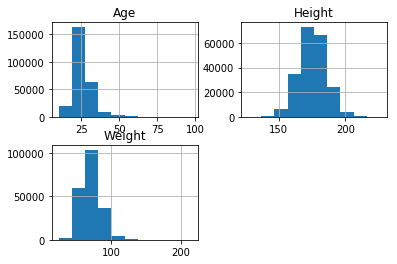

In [243]:
df.hist(['Age', 'Height', 'Weight'])

### Plot the histograms again, but separately for men and women

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27eedeb8>,
      dtype=object)

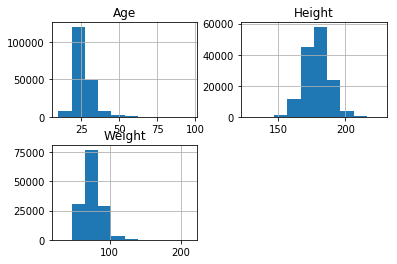

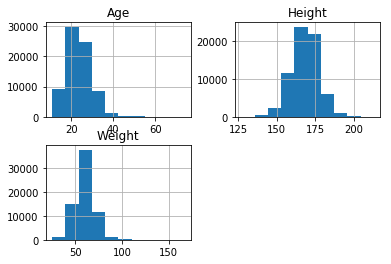

In [289]:
males = df.Sex == 'M'
females = df.Sex == 'F'


df[males].hist(['Age', 'Height', 'Weight'])
df[females].hist(['Age', 'Height', 'Weight'])




### Here is an attempt to plot the number of participants as a function of year. What happaned in mid 1990s that makes this graph look so weird? Plot a more useful graph (or several)

([<matplotlib.axis.XTick at 0x1a32aee358>,
 <a list of 10 Text xticklabel objects>)

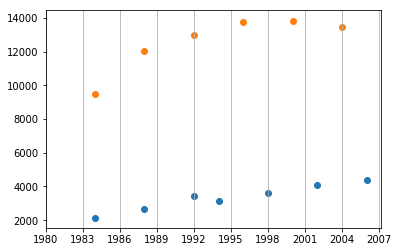

In [394]:
# df.groupby(['Year'])['ID'].count().plot()
# plt.grid()

# df.groupby(['Year']) > 2000
# df[df.Year < 1997].groupby('Year').describe()
# df[df.Year >= 1997].groupby('Year').describe()
start = 1980
end = 2008
winter = df[(df.Season == 'Winter') & (df.Year > start) & (df.Year < end)].groupby('Year')['ID']
plt.scatter(winter.groups.keys(), winter.count())

summer = df[(df.Season == 'Summer') & (df.Year > start) & (df.Year < end)].groupby('Year')['ID']
plt.scatter(summer.groups.keys(), summer.count())

plt.grid(axis='x', marker='.')

plt.xticks(np.arange(start, end, 3))



### Plot the average height of participants as a function of year - did they grow taller during the last century? (population on average did)

In [422]:
df.groupby('Year')['Height'].mean().plot()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
